In [17]:
import numpy as np
import matplotlib.pyplot as plt

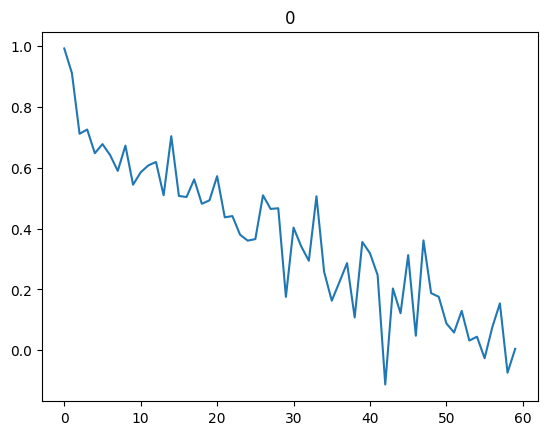

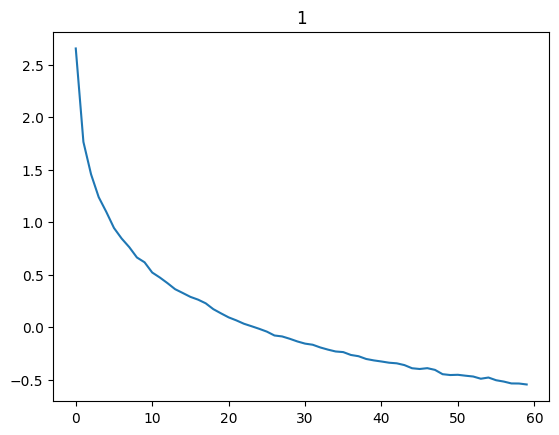

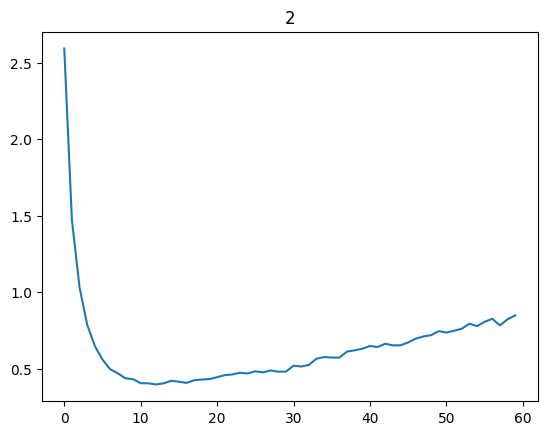

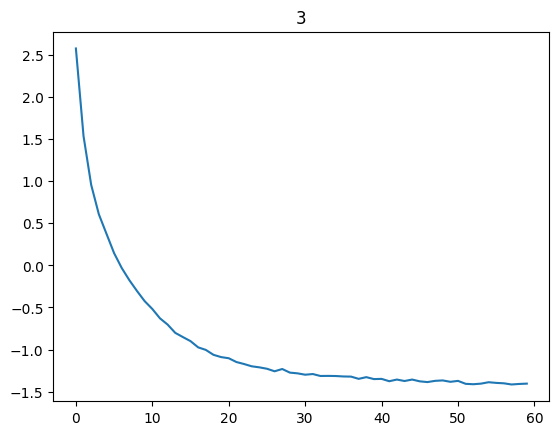

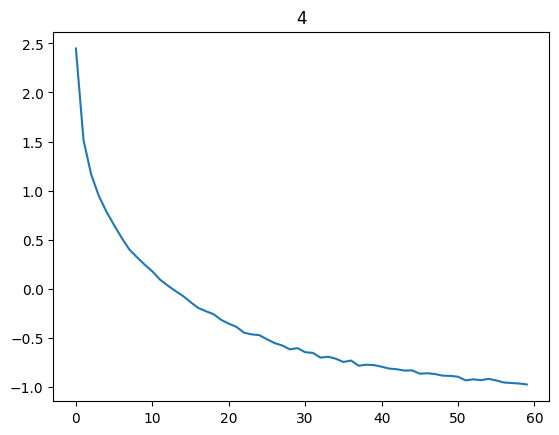

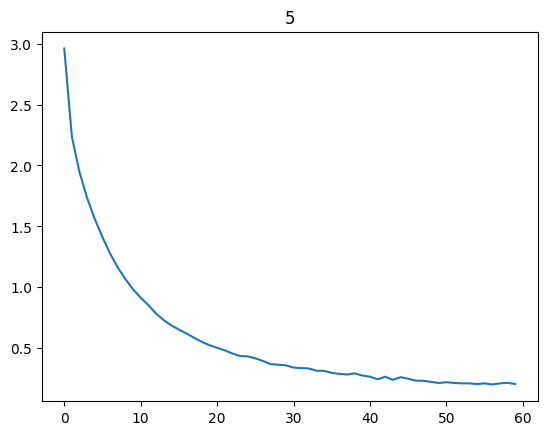

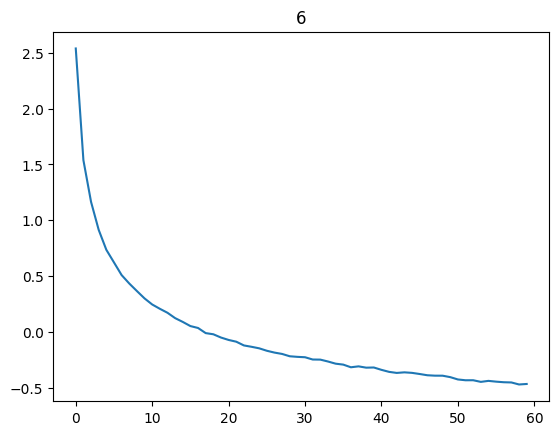

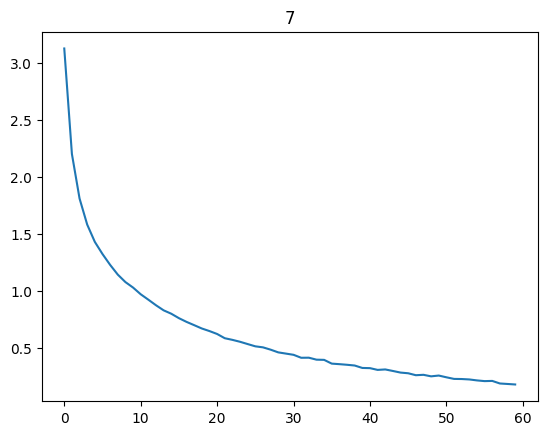

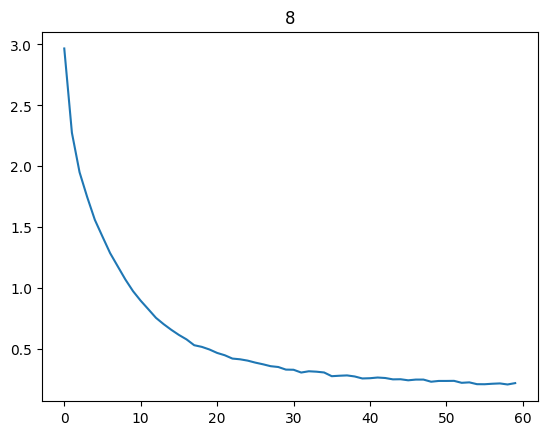

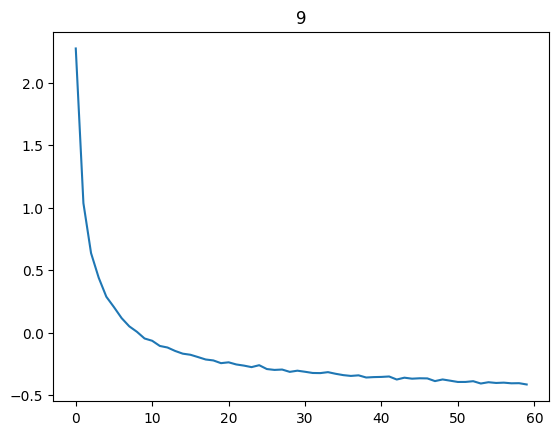

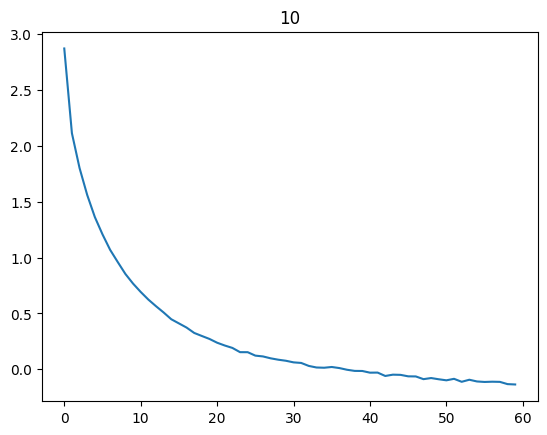

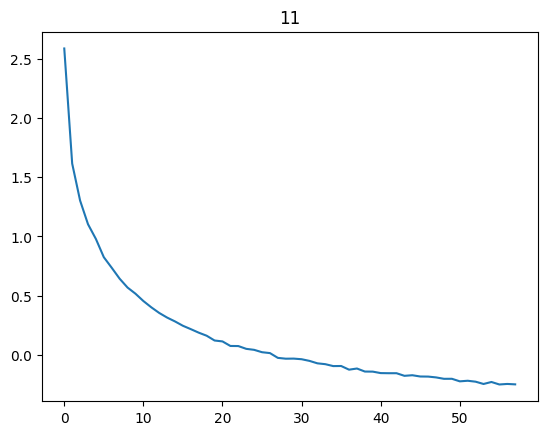

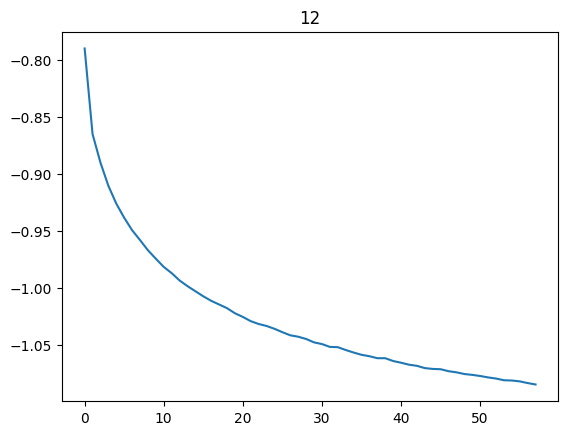

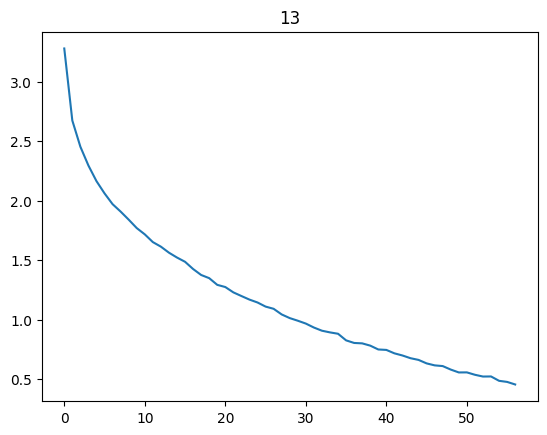

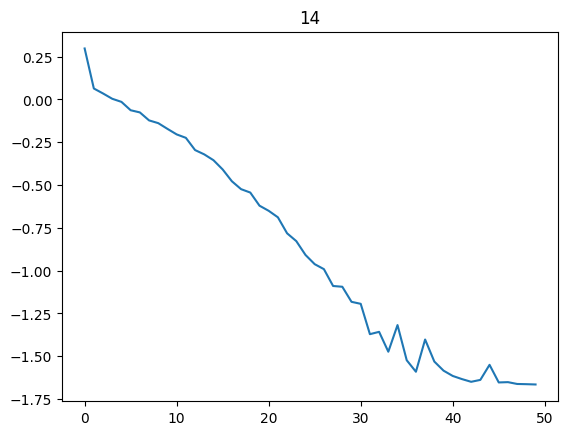

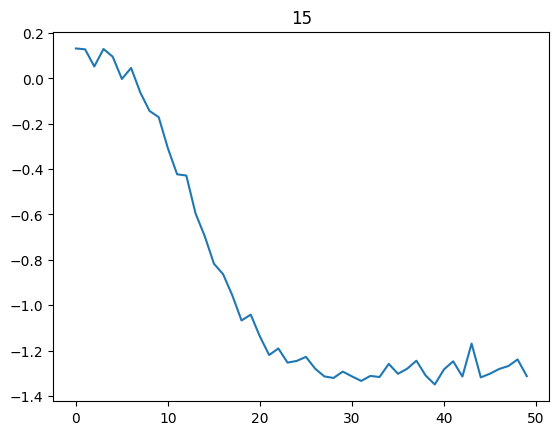

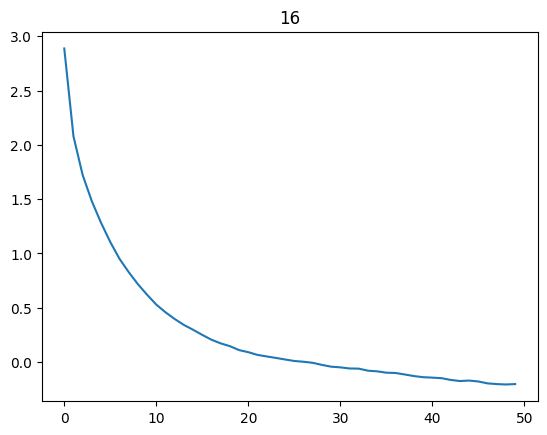

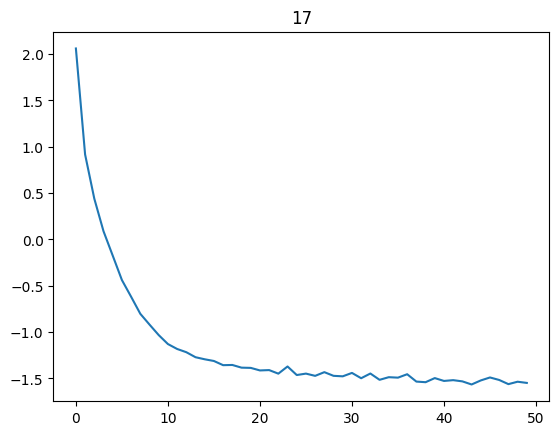

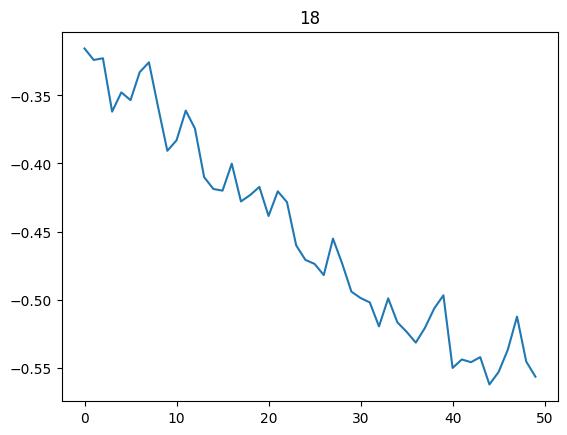

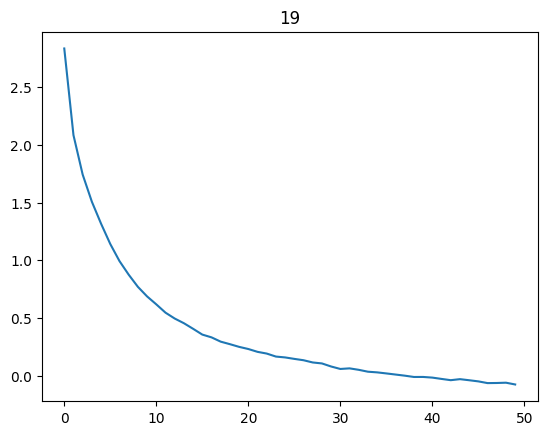

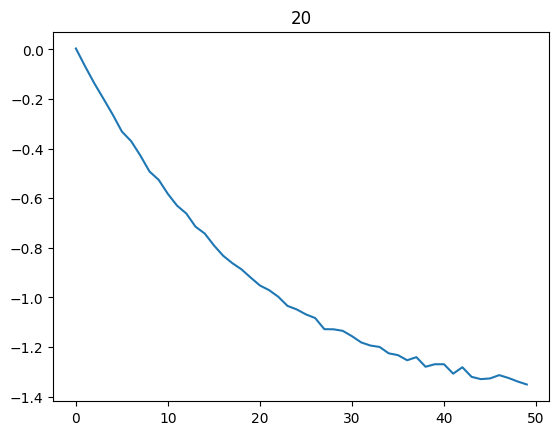

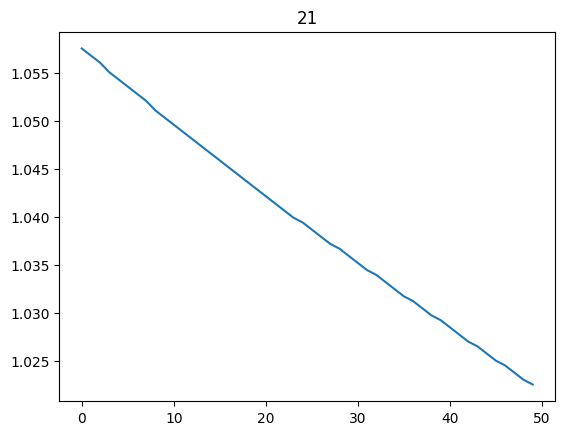

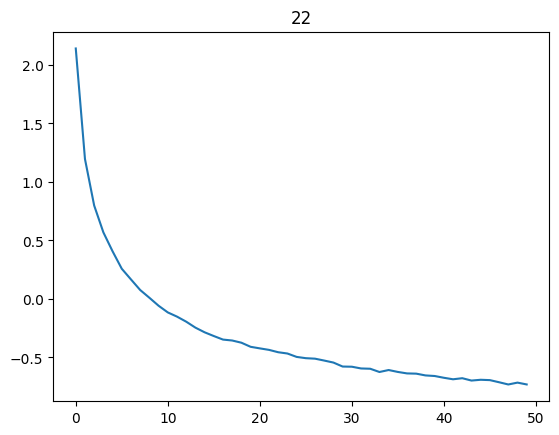

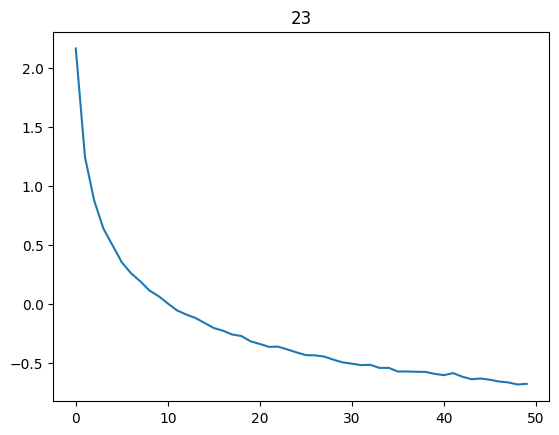

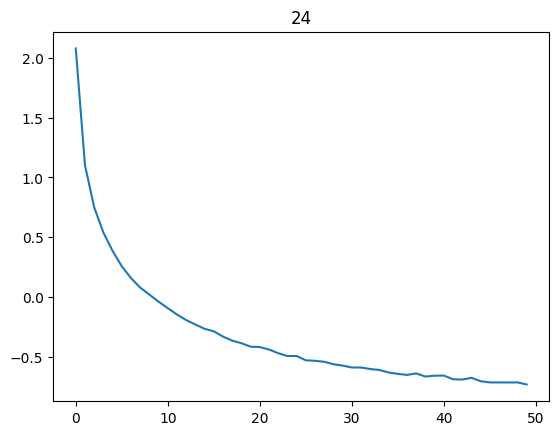

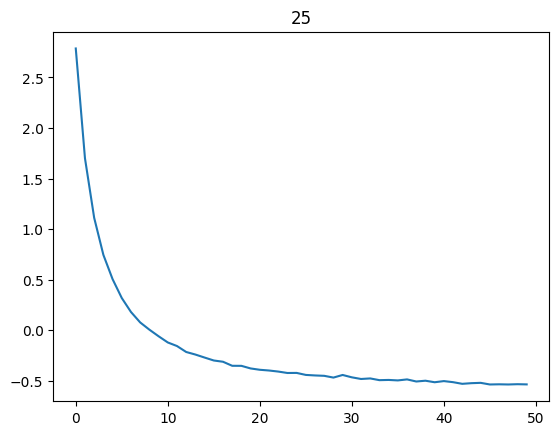

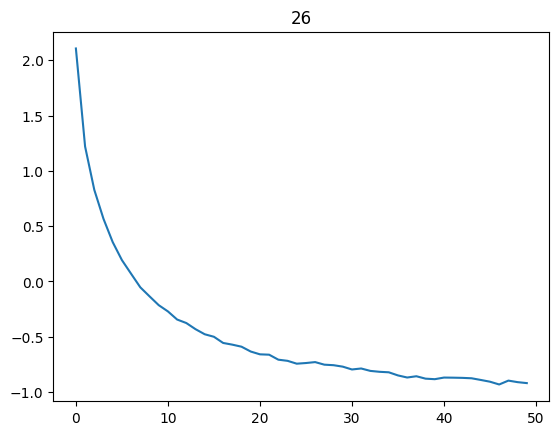

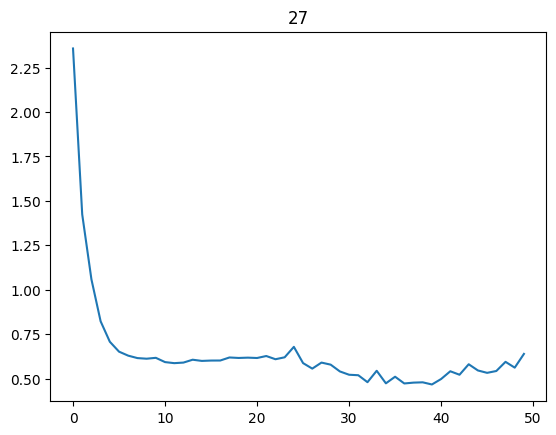

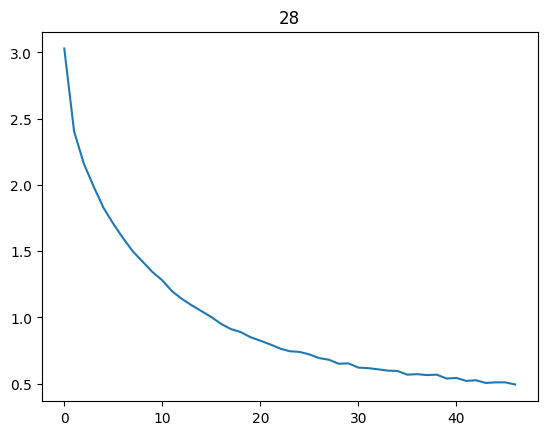

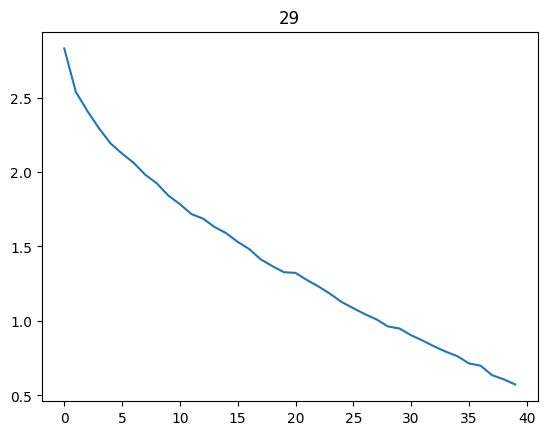

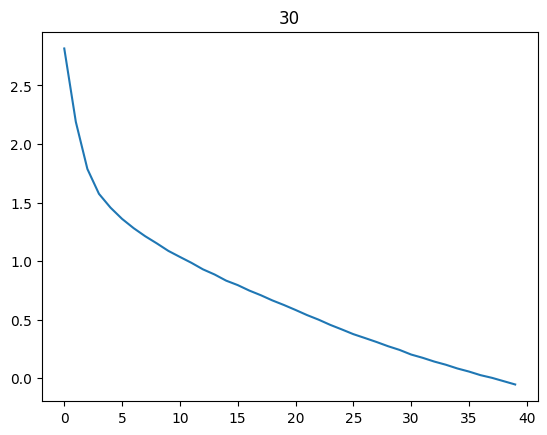

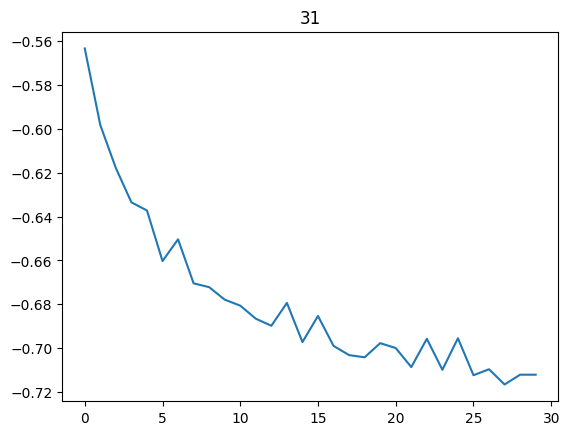

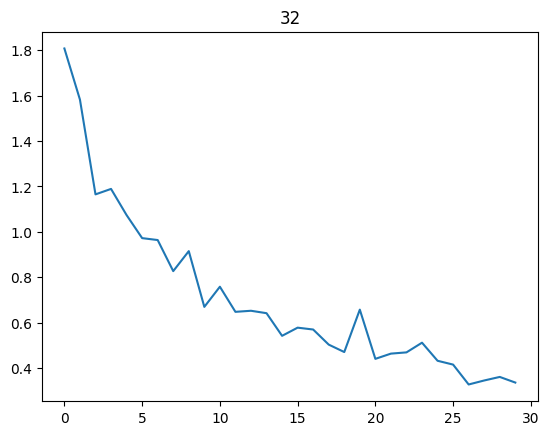

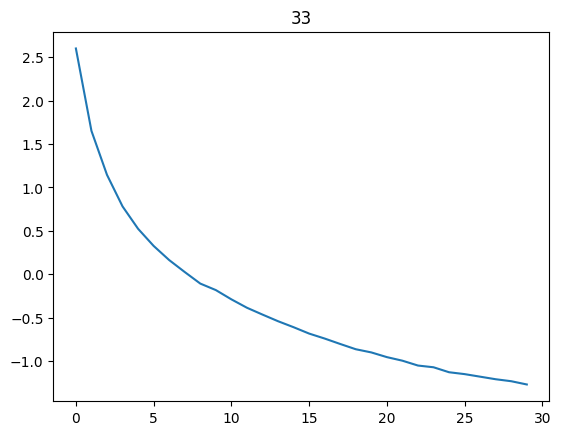

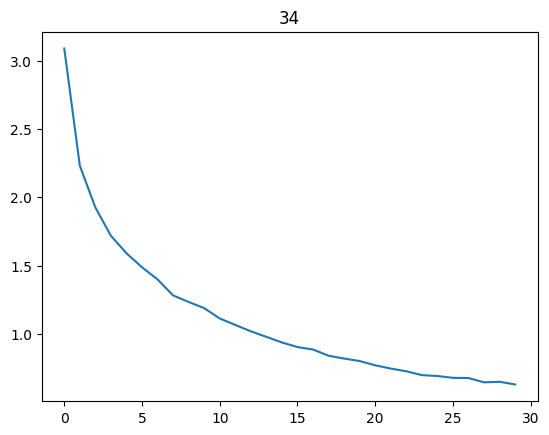

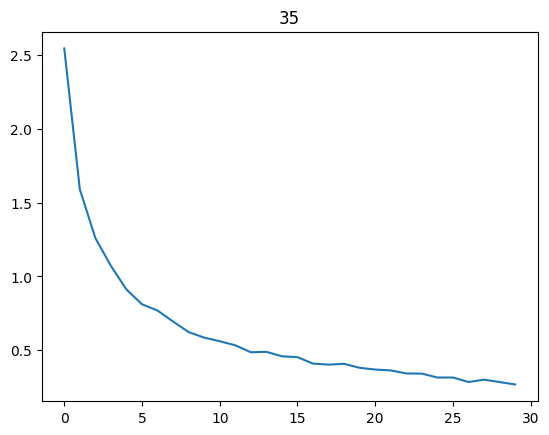

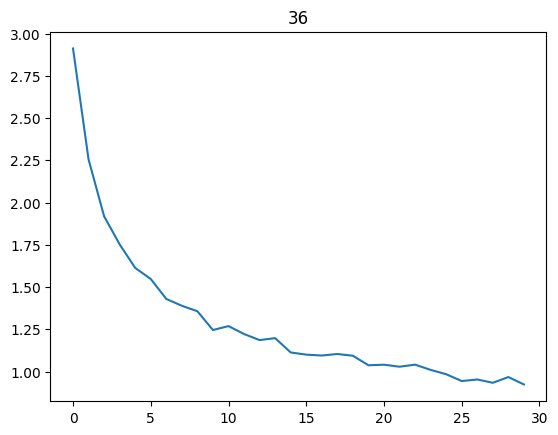

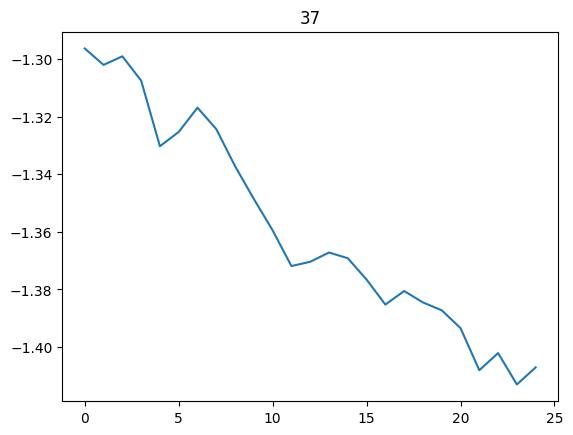

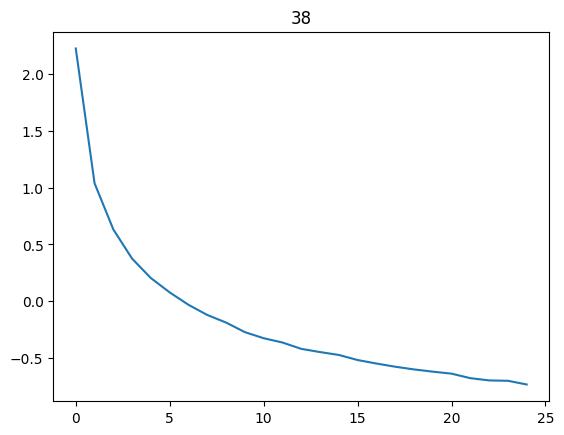

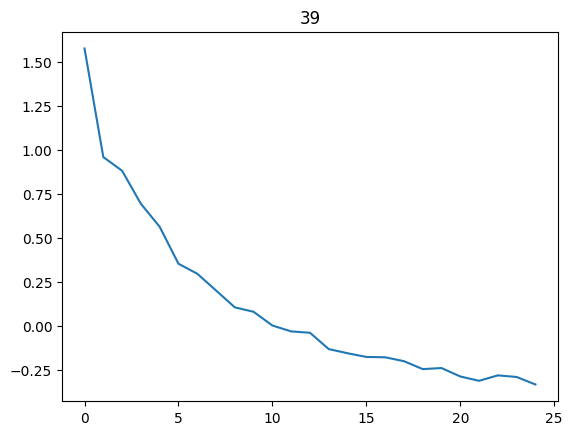

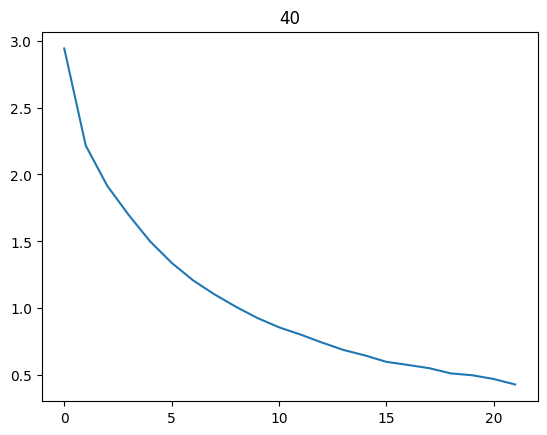

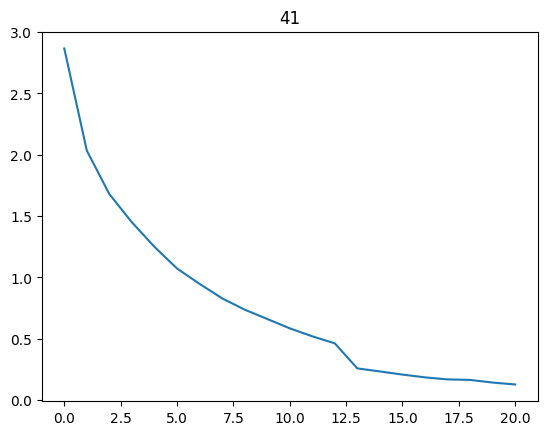

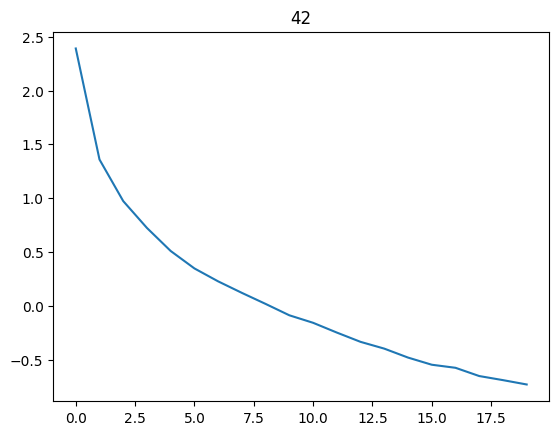

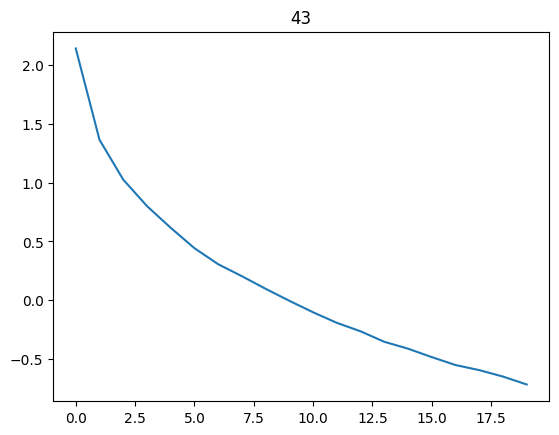

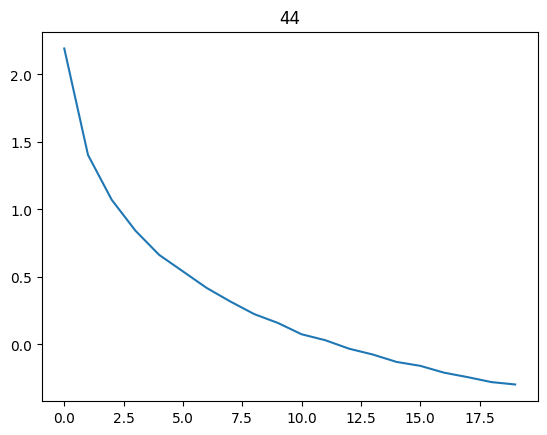

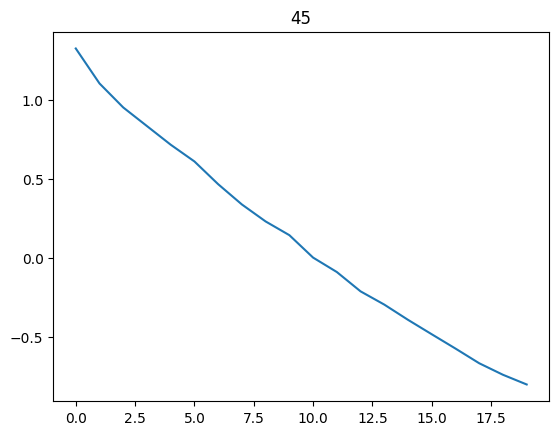

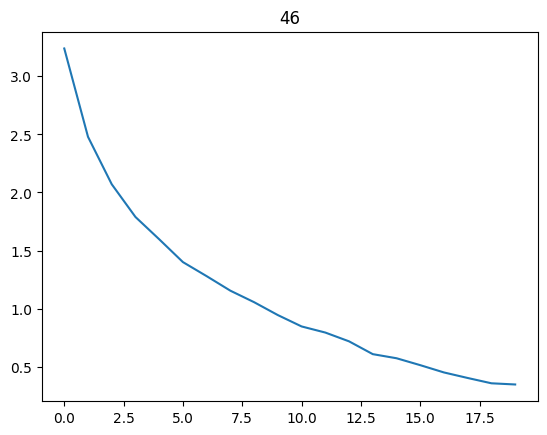

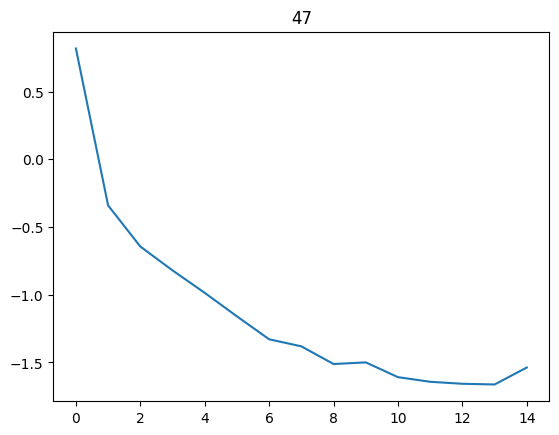

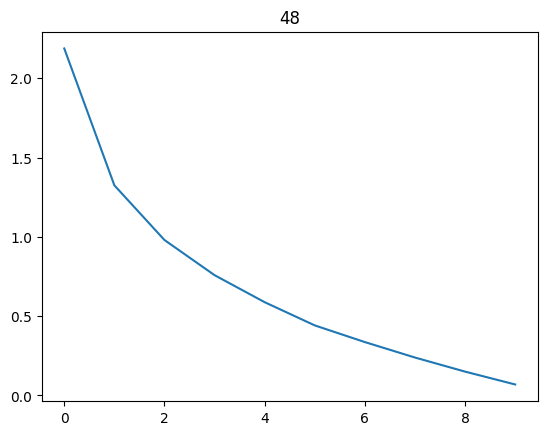

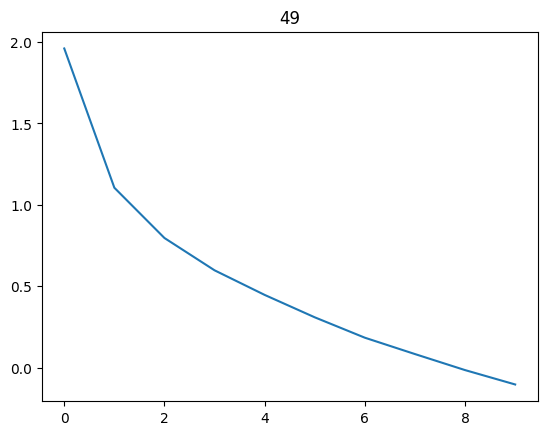

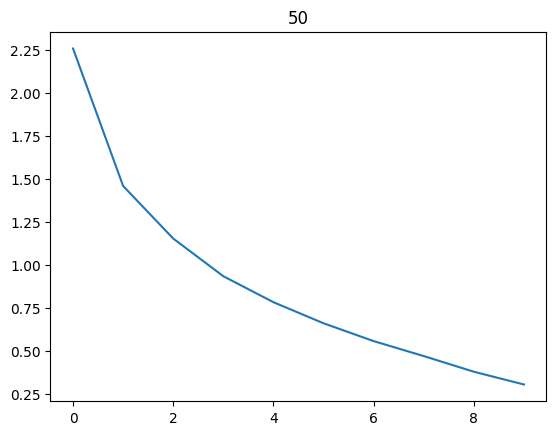

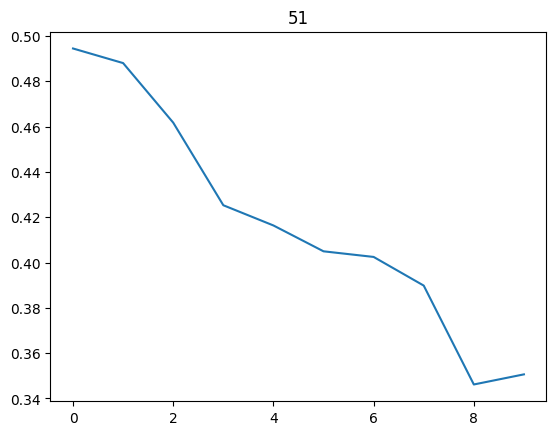

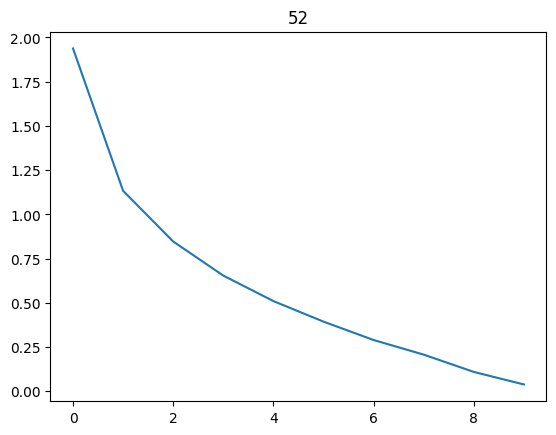

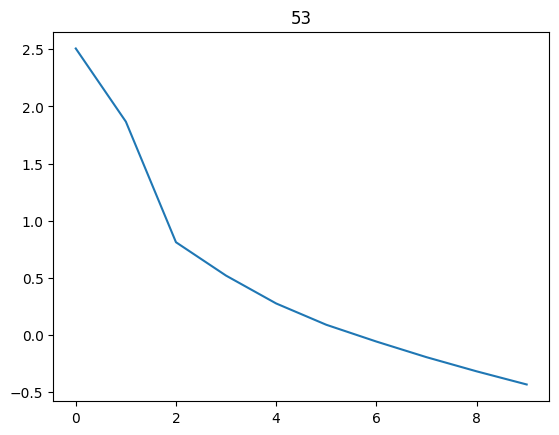

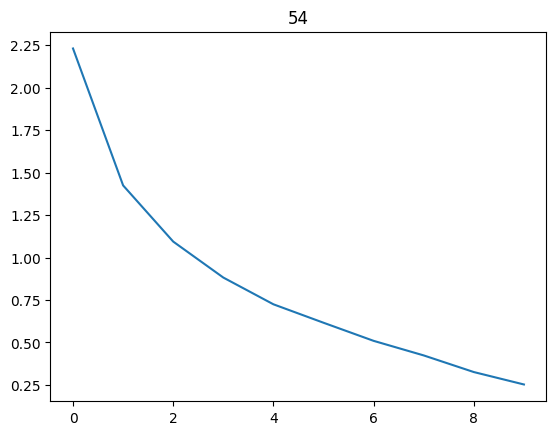

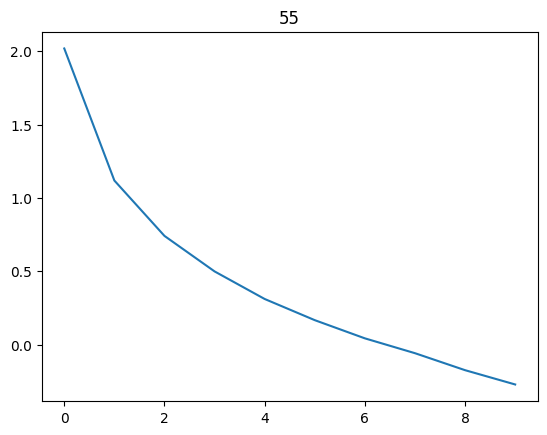

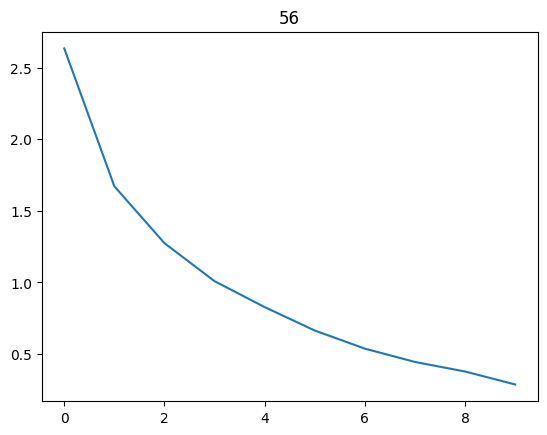

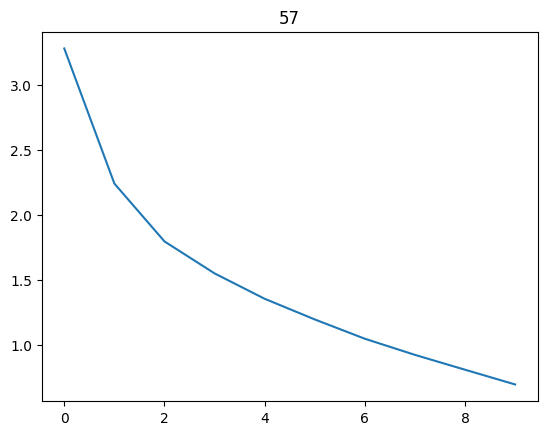

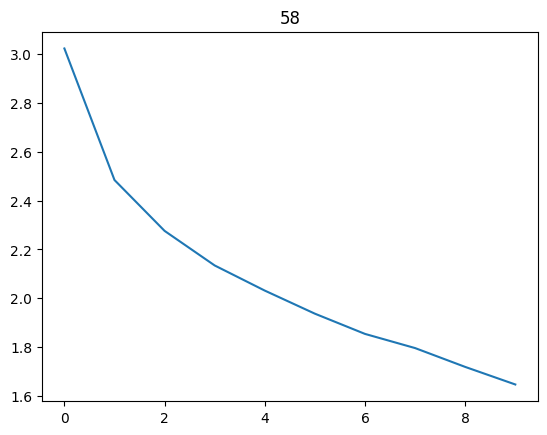

KeyboardInterrupt: 

In [20]:
for ix,s in enumerate(t):
    plt.plot(s)
    plt.title(ix)
    plt.show()

### Conditions when to stop:
- values start to increase -> max increase allowed: 0.005 for 3 epochs straight
- values don't decrease sufficiently -> min decrease: 0.003

46 -0.39839675 -0.39045996 0.007936790000000027 0.019921824161467247
50 -0.45593847 -0.45370625 0.002232220000000007 0.0048958799199374575
54 -0.49115797 -0.47974884 0.01140912999999999 0.02322904380437925


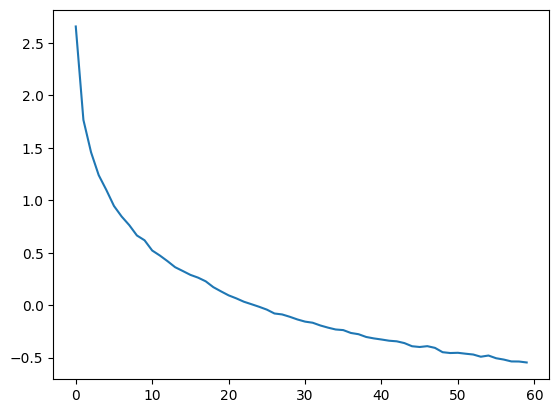

In [76]:
sequence = t[1]
changes = []
for i in range(1, len(sequence)):
    change = (sequence[i] - sequence[i-1]) / abs(sequence[i-1])
    if change > MIN_DECREASE or change > MAX_INCREASE :
        print(i, sequence[i-1],sequence[i], sequence[i]- sequence[i-1], change)
    changes.append(change)

#print(changes)
plt.plot(sequence)
plt.show()

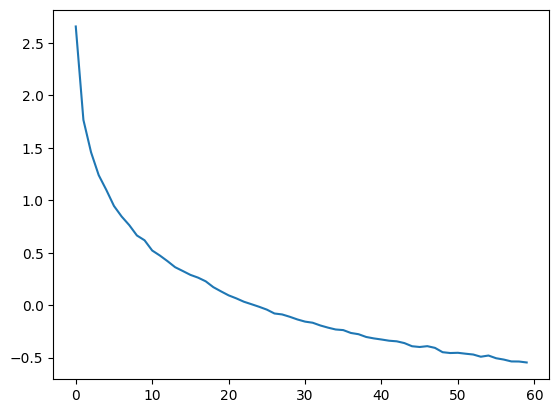

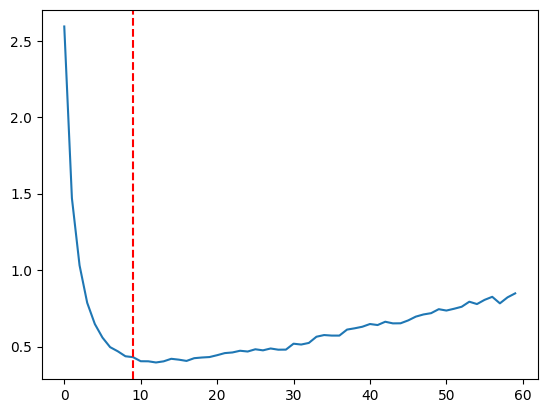

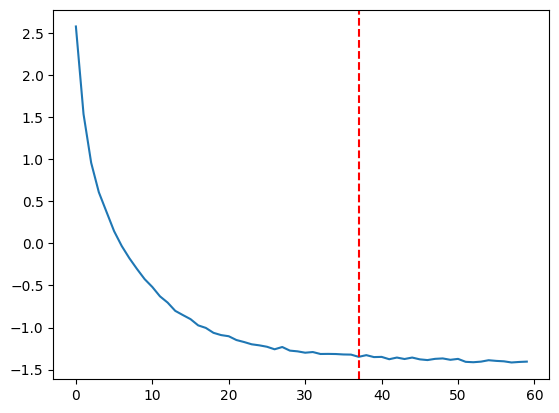

In [78]:
MIN_DECREASE = -0.001
MAX_INCREASE = 0.0005
WINDOW = 10
SLACK_RATE_DECREASE, SLACK_RATE_INCREASE = 0.5, 0.5
SLACK_RATE_DECREASE, SLACK_RATE_INCREASE = SLACK_RATE_DECREASE * WINDOW, SLACK_RATE_INCREASE * WINDOW
def find_stabilization_point(sequence):
    """
    Identifies the point at which the sequence stops significantly decreasing.
    
    :param sequence: List of float values (the sequence to analyze)
    :param change_threshold: The threshold for determining a "significant" change between consecutive values
    :param oscillation_window: Number of previous values to consider when determining oscillation behavior
    :return: The index of the first value where the sequence stops significantly decreasing, or None if not found
    """
    
    if len(sequence) < 2:
        return None  # A sequence with less than 2 values can't have a significant decrease
    
    changes = []  # List to track the relative changes in values
    
    for i in range(1, len(sequence)):
        change = (sequence[i] - sequence[i-1]) / abs(sequence[i-1])
        changes.append(change)
    
    # Check if consecutive changes are consistently smaller than the threshold
    stable_count = 0
    for i in range(WINDOW, len(changes)):
        # Consider the last few changes for oscillation detection
        # check for increasing behaviour:
        if [change > MAX_INCREASE for change in changes[i-WINDOW: i]].count(True) >= SLACK_RATE_INCREASE:
            return i-WINDOW

        # check for decreasing behaviour:
        if [change > MIN_DECREASE for change in changes[i-WINDOW: i]].count(True) >= SLACK_RATE_DECREASE:
            return i
            
    return  # No stabilization point found

# Example usage:
for sequence in t[1:4]:
    stable_point = find_stabilization_point(sequence)
    plt.plot(sequence)
    if stable_point:
        plt.axvline(x=stable_point, color='r', linestyle='--', label='stable_point')
    plt.show()


In [16]:
t =[np.array([2.18775645, 1.32463061, 0.97987632, 0.75814227, 0.58774933,
        0.44141477, 0.33625232, 0.23877862, 0.14998579, 0.06888173]),
 np.array([ 0.29805652,  0.06416926,  0.03515037,  0.00414729, -0.01395851,
        -0.06281937, -0.07546863, -0.12209727, -0.13821887, -0.1717022 ,
        -0.20394541, -0.22403541, -0.29546651, -0.32076503, -0.3547444 ,
        -0.40881378, -0.47776464, -0.52389723, -0.5437392 , -0.62037882,
        -0.65038981, -0.68833758, -0.78184288, -0.82747942, -0.90833546,
        -0.96215681, -0.9911757 , -1.08964149, -1.09410593, -1.18215469,
        -1.19381185, -1.37114949, -1.35750813, -1.47358367, -1.31807221,
        -1.52343663, -1.59065132, -1.40240059, -1.5311254 , -1.58420267,
        -1.61520576, -1.63355958, -1.64943316, -1.63827205, -1.55022329,
        -1.65315353, -1.65141736, -1.66208242, -1.66332254, -1.66505872]),
 np.array([ 0.13212801,  0.12840764,  0.05276012,  0.12989579,  0.09591641,
        -0.00230135,  0.04631148, -0.0620753 , -0.14317936, -0.1707101 ,
        -0.30836379, -0.42270316, -0.42815971, -0.59483228, -0.6955303 ,
        -0.81681436, -0.86344299, -0.95670027, -1.06731927, -1.0415247 ,
        -1.13825432, -1.21960642, -1.19083555, -1.25308975, -1.24564901,
        -1.22779123, -1.27987641, -1.31410381, -1.32080048, -1.29277369,
        -1.31385579, -1.33394579, -1.31187159, -1.31658406, -1.25879431,
        -1.30244665, -1.28012443, -1.24465691, -1.30963937, -1.34957134,
        -1.28310073, -1.24738518, -1.31459986, -1.16925741, -1.31832023,
        -1.3019506 , -1.28111653, -1.26821925, -1.23920036, -1.31286369]),
 np.array([ 2.88793008,  2.07862559,  1.72196612,  1.4803901 ,  1.28197037,
         1.1053768 ,  0.95135349,  0.8288293 ,  0.71746623,  0.62024056,
         0.52946353,  0.45852848,  0.39677033,  0.34195688,  0.29756047,
         0.25018776,  0.20579134,  0.17230801,  0.14651345,  0.11030184,
         0.09120395,  0.06615345,  0.05201605,  0.03837469,  0.02398926,
         0.01009988,  0.00315519, -0.0067658 , -0.0258637 , -0.04223333,
        -0.04843394, -0.05885098, -0.06033913, -0.079189  , -0.08514159,
        -0.09754283, -0.1002711 , -0.11416048, -0.12879393, -0.13896295,
        -0.14317936, -0.14813986, -0.16450949, -0.17443047, -0.17021405,
        -0.17864689, -0.19600862, -0.20245726, -0.20617763, -0.20245726]),
 np.array([ 2.06027177,  0.91663003,  0.43992663,  0.08847567, -0.17443047,
        -0.43857674, -0.61864265, -0.80292498, -0.91924854, -1.03259582,
        -1.12932544, -1.18240272, -1.21737419, -1.27144357, -1.29376579,
        -1.31211962, -1.3572601 , -1.35502788, -1.38404677, -1.38652702,
        -1.41405775, -1.41033738, -1.44878121, -1.37139751, -1.46366269,
        -1.44828516, -1.47259157, -1.4326596 , -1.47234355, -1.47755207,
        -1.44084442, -1.49813812, -1.44729306, -1.51525182, -1.48697701,
        -1.4919375 , -1.45498182, -1.53434972, -1.54104638, -1.49664997,
        -1.52740503, -1.51897219, -1.53211749, -1.56560082, -1.52194848,
        -1.4899533 , -1.51698799, -1.56188045, -1.53583786, -1.54873515]),
 np.array([ 1.96056585,  1.10512878,  0.79633807,  0.59791834,  0.44687132,
         0.30921763,  0.18396517,  0.08351518, -0.01495061, -0.10324739]),
 np.array([ 0.81766819, -0.340607  , -0.64394117, -0.8202867 , -0.98596718,
        -1.15958445, -1.32873727, -1.38082245, -1.51128342, -1.49937824,
        -1.60826107, -1.64248847, -1.65712193, -1.66233044, -1.53707799]),
 np.array([ 0.99178151,  0.91092547,  0.71151363,  0.72540302,  0.64752327,
         0.67753426,  0.64132265,  0.5894855 ,  0.67257376,  0.54409699,
         0.58477303,  0.6075913 ,  0.61875241,  0.50937353,  0.70357685,
         0.50714131,  0.50366896,  0.56145871,  0.48134674,  0.49275588,
         0.57212377,  0.43695033,  0.44091872,  0.37990466,  0.36031071,
         0.3652712 ,  0.50912551,  0.46448107,  0.46671329,  0.17553233,
         0.40321897,  0.34170886,  0.29408812,  0.50614921,  0.25787652,
         0.16288307,  0.22389714,  0.28639936,  0.1078216 ,  0.35584626,
         0.31889059,  0.24721146, -0.11242431,  0.20306307,  0.12171098,
         0.31268997,  0.04779963,  0.36105478,  0.18768554,  0.17578036,
         0.08822765,  0.05846469,  0.12939974,  0.03192605,  0.04457531,
        -0.02611172,  0.07508234,  0.15420221, -0.07373246,  0.00464334]),
 np.array([-1.29624604, -1.3019506 , -1.29897431, -1.30740715, -1.33022542,
        -1.32526492, -1.31683208, -1.32427282, -1.33717011, -1.34857924,
        -1.35949233, -1.37189356, -1.37040541, -1.36718109, -1.36916529,
        -1.37660603, -1.38528689, -1.38057442, -1.38454282, -1.38727109,
        -1.39347171, -1.40810516, -1.40215257, -1.41306565, -1.40711306]),
 np.array([-0.31555651, -0.32398935, -0.32274922, -0.36193712, -0.34779971,
        -0.35350428, -0.33291823, -0.32572552, -0.3587128 , -0.39070798,
        -0.38301922, -0.36119305, -0.37433835, -0.41005391, -0.41873477,
        -0.41997489, -0.40013292, -0.42791168, -0.42319921, -0.41724662,
        -0.43857674, -0.42047094, -0.42840773, -0.46015489, -0.47081995,
        -0.47379624, -0.48198106, -0.45519439, -0.47354822, -0.49413427,
        -0.49884674, -0.50207106, -0.51968081, -0.49909476, -0.51670451,
        -0.5236492 , -0.53158599, -0.52067291, -0.5065355 , -0.49686254,
        -0.55018784, -0.54398722, -0.54597142, -0.54225105, -0.56234105,
        -0.55316414, -0.53679451, -0.51248809, -0.54547537, -0.55663648]),
 np.array([ 2.65602702,  1.76561847,  1.45707578,  1.23931012,  1.09793606,
         0.94540089,  0.84519893,  0.76285474,  0.66438895,  0.61850439,
         0.52103069,  0.47340996,  0.41983663,  0.36204688,  0.32583528,
         0.2888796 ,  0.26258899,  0.22761751,  0.17181196,  0.13187999,
         0.09368419,  0.06516136,  0.03291815,  0.00910778, -0.01544666,
        -0.04223333, -0.079189  , -0.08811789, -0.11044011, -0.13598665,
        -0.1565727 , -0.16723776, -0.19328035, -0.21386639, -0.23147615,
        -0.23742874, -0.26471145, -0.27661663, -0.30290725, -0.31654861,
        -0.32696564, -0.3386228 , -0.34432737, -0.36119305, -0.39120403,
        -0.39839675, -0.39045996, -0.40682958, -0.44800168, -0.45593847,
        -0.45370625, -0.46238711, -0.47007587, -0.49115797, -0.47974884,
        -0.5055434 , -0.51819266, -0.53605044, -0.53679451, -0.54597142]),
 np.array([2.59302875, 1.47022109, 1.03121743, 0.78641708, 0.64752327,
        0.55873044, 0.49622822, 0.46919354, 0.4367023 , 0.43074971,
        0.40421107, 0.40371502, 0.39602626, 0.403467  , 0.42008465,
        0.41438008, 0.40619527, 0.42405305, 0.42851749, 0.43149379,
        0.443647  , 0.45728835, 0.46150477, 0.47266588, 0.46770539,
        0.48233884, 0.47539415, 0.48754736, 0.47961057, 0.48010662,
        0.51879847, 0.51334193, 0.52375896, 0.56443501, 0.57534809,
        0.57187575, 0.57187575, 0.61106365, 0.61949648, 0.6296655 ,
        0.64752327, 0.6408266 , 0.66240475, 0.65173969, 0.65223574,
        0.67108561, 0.69588808, 0.71002549, 0.71845833, 0.74450092,
        0.73557203, 0.74722919, 0.76037449, 0.79336177, 0.77798425,
        0.80551498, 0.82535696, 0.78269671, 0.82188461, 0.8479272 ]),
 np.array([2.25720335, 1.45781986, 1.15200544, 0.93299966, 0.78195264,
        0.65942845, 0.55575414, 0.46869749, 0.37767243, 0.30351306]),
 np.array([0.49449205, 0.48804341, 0.4617528 , 0.42529317, 0.41636428,
        0.40495515, 0.4024749 , 0.38982564, 0.3461733 , 0.35063775]),
 np.array([1.93774758, 1.13290754, 0.84668708, 0.65397191, 0.50986958,
        0.39379404, 0.2898717 , 0.20727949, 0.10955777, 0.03862272]),
 np.array([2.82964428, 2.5382153 , 2.40973852, 2.29415903, 2.19222089,
        2.12351806, 2.06200794, 1.98189597, 1.92435425, 1.84201006,
        1.78422032, 1.71750168, 1.68724267, 1.63069305, 1.58952095,
        1.53098713, 1.48212627, 1.41317542, 1.3677869 , 1.32711086,
        1.32264641, 1.27403358, 1.23087729, 1.1817684 , 1.1264589 ,
        1.08553483, 1.04560286, 1.01038336, 0.96276262, 0.94912126,
        0.90373275, 0.8680172 , 0.82858128, 0.79336177, 0.76310277,
        0.71448993, 0.69960845, 0.63586611, 0.60808735, 0.57311587]),
 np.array([3.28005708, 2.67413282, 2.45388691, 2.29564718, 2.16444213,
        2.06151189, 1.97073486, 1.90823265, 1.84052191, 1.76958686,
        1.71675761, 1.65177514, 1.61333132, 1.56273429, 1.52181022,
        1.48609467, 1.42532862, 1.37522764, 1.34844098, 1.29213938,
        1.27378555, 1.22889309, 1.19813803, 1.16812705, 1.14382063,
        1.1093452 , 1.09074335, 1.04337064, 1.01261558, 0.99054138,
        0.96648299, 0.93324769, 0.90646102, 0.89232362, 0.88091448,
        0.82535696, 0.80353079, 0.80005844, 0.78096054, 0.74871733,
        0.74499696, 0.7162261 , 0.6981203 , 0.67530203, 0.6609166 ,
        0.63164969, 0.61503204, 0.60907945, 0.57956451, 0.55550612,
        0.55600217, 0.53591217, 0.52103069, 0.52177477, 0.48506711,
        0.4758902 , 0.45431206]),
 np.array([ 2.58906036,  1.61605959,  1.30330049,  1.10314458,  0.97814015,
         0.82411683,  0.73457993,  0.64231475,  0.5674113 ,  0.51557415,
         0.45356798,  0.4004907 ,  0.35286997,  0.31368207,  0.28094281,
         0.24423516,  0.21571233,  0.18594937,  0.1601548 ,  0.11972678,
         0.11203802,  0.07359419,  0.07285012,  0.04928778,  0.04085494,
         0.02076494,  0.0133242 , -0.02710382, -0.03404851, -0.03330444,
        -0.03851296, -0.05265036, -0.07323641, -0.08042912, -0.09655073,
        -0.09580665, -0.12680974, -0.11713677, -0.14268332, -0.14342739,
        -0.15582862, -0.15682072, -0.15682072, -0.17889492, -0.17393442,
        -0.18459948, -0.18534356, -0.19228825, -0.20419343, -0.20394541,
        -0.22552355, -0.22056306, -0.22849985, -0.24784577, -0.2309801 ,
        -0.25206219, -0.24759775, -0.25107009]),
 np.array([ 2.57690715,  1.5356996 ,  0.95705805,  0.60808735,  0.37568824,
         0.1450253 , -0.03156826, -0.17666269, -0.30489145, -0.42518341,
        -0.51794463, -0.62905969, -0.70321906, -0.80168485, -0.85178584,
        -0.90015065, -0.974062  , -1.004321  , -1.0626068 , -1.08964149,
        -1.10328285, -1.14817531, -1.17198568, -1.19902037, -1.2114216 ,
        -1.22828728, -1.25829826, -1.23126357, -1.27417184, -1.2828527 ,
        -1.29897431, -1.29103752, -1.31410381, -1.31311171, -1.31459986,
        -1.31980838, -1.32154455, -1.34808319, -1.32799319, -1.35105949,
        -1.34857924, -1.376358  , -1.35651603, -1.37387776, -1.35651603,
        -1.37784615, -1.38652702, -1.37189356, -1.36693307, -1.38330269,
        -1.37238961, -1.40736109, -1.41207356, -1.40512887, -1.38826319,
        -1.39619998, -1.40116047, -1.41504985, -1.40884924, -1.40488084]),
 np.array([ 2.50746024,  1.86730858,  0.8127077 ,  0.52053464,  0.27697442,
         0.0907079 , -0.05612271, -0.1927843 , -0.31654861, -0.43163205]),
 np.array([2.23116076, 1.42458455, 1.09371965, 0.88190658, 0.72441092,
        0.61577611, 0.50912551, 0.42330897, 0.32533923, 0.25217195]),
 np.array([2.86610391, 2.0334851 , 1.67880983, 1.44889097, 1.24898309,
        1.07238952, 0.94713707, 0.82907733, 0.73681215, 0.6609166 ,
        0.58452501, 0.51929452, 0.46200082, 0.2576285 , 0.23307405,
        0.20727949, 0.18470924, 0.16809159, 0.16387517, 0.14229703,
        0.12667147]),
 np.array([ 2.01909967,  1.11877014,  0.74127659,  0.49920452,  0.31120182,
         0.16685147,  0.04283914, -0.05835493, -0.17418245, -0.27165614]),
 np.array([2.63320875, 1.67062502, 1.27353753, 1.00815114, 0.82709313,
        0.66364487, 0.53715229, 0.44414304, 0.37742441, 0.28689541]),
 np.array([ 2.4486784 ,  1.5136254 ,  1.16440668,  0.94540089,  0.78418486,
         0.64752327,  0.5170623 ,  0.39900256,  0.31938664,  0.24497924,
         0.17627641,  0.09294012,  0.0324221 , -0.02239135, -0.07373246,
        -0.13697875, -0.19600862, -0.22949195, -0.25950293, -0.3175407 ,
        -0.3567286 , -0.38921983, -0.44899378, -0.46585945, -0.47354822,
        -0.51596044, -0.55465229, -0.57920673, -0.61864265, -0.60624142,
        -0.64790956, -0.65460623, -0.70272301, -0.69429017, -0.71388412,
        -0.74761548, -0.732734  , -0.78531522, -0.77564226, -0.77936263,
        -0.79548424, -0.81483016, -0.82152683, -0.83516818, -0.83318399,
        -0.86666732, -0.8624509 , -0.87038769, -0.88675731, -0.88898954,
        -0.89791842, -0.9348741 , -0.92445706, -0.9328899 , -0.91974459,
        -0.93561817, -0.95645224, -0.96190879, -0.96686928, -0.97679027]),
 np.array([3.28303337, 2.24405805, 1.79885377, 1.5528133 , 1.35761789,
        1.19863408, 1.0500673 , 0.92605497, 0.8117156 , 0.69836833]),
 np.array([-0.78977967, -0.86493114, -0.88998163, -0.91031966, -0.92594521,
        -0.93834644, -0.94925953, -0.95794039, -0.96686928, -0.97431002,
        -0.98150274, -0.98695928, -0.99340792, -0.99836841, -1.00283286,
        -1.0072973 , -1.0112657 , -1.01449002, -1.01771434, -1.02217878,
        -1.0254031 , -1.02912347, -1.03160372, -1.03333989, -1.03582014,
        -1.03879643, -1.0415247 , -1.04276483, -1.04474903, -1.04772532,
        -1.04921347, -1.05169372, -1.05194174, -1.05442199, -1.05665421,
        -1.05863841, -1.05987853, -1.0616147 , -1.0616147 , -1.06409495,
        -1.0655831 , -1.06731927, -1.06831137, -1.07029557, -1.07103964,
        -1.07128766, -1.07302384, -1.07401594, -1.07550408, -1.07624816,
        -1.07724026, -1.07848038, -1.07947248, -1.08096063, -1.08120865,
        -1.08195273, -1.08344087, -1.084681  ]),
 np.array([2.96060131, 2.23488113, 1.94370018, 1.73188711, 1.55975799,
        1.41119122, 1.27651382, 1.1626705 , 1.06718101, 0.98384472,
        0.91439781, 0.85412782, 0.78517696, 0.73135561, 0.68819932,
        0.65248376, 0.62123266, 0.58502106, 0.55277785, 0.52475106,
        0.50391699, 0.48258687, 0.45654428, 0.43620626, 0.43298193,
        0.41686033, 0.39503416, 0.36948762, 0.36477515, 0.35931861,
        0.34121281, 0.33699639, 0.33402009, 0.31541824, 0.31417812,
        0.29756047, 0.28937565, 0.28416714, 0.2938401 , 0.27623035,
        0.26581331, 0.24473121, 0.26606133, 0.24076282, 0.26209294,
        0.24944368, 0.23381813, 0.232578  , 0.22340109, 0.2144722 ,
        0.22092085, 0.21472023, 0.21149591, 0.21149591, 0.20579134,
        0.21149591, 0.202319  , 0.21124788, 0.21596035, 0.20579134]),
 np.array([2.94150341, 2.21627928, 1.91567339, 1.69741168, 1.499488  ,
        1.34000814, 1.20880309, 1.10364063, 1.01087941, 0.92704707,
        0.85809621, 0.80402684, 0.74425289, 0.68894339, 0.64801932,
        0.59990254, 0.57683624, 0.55252982, 0.51358995, 0.49970057,
        0.47167378, 0.43074971]),
 np.array([ 2.53846333,  1.53842787,  1.16515075,  0.91464584,  0.7363161 ,
         0.62321685,  0.50986958,  0.43447008,  0.36700737,  0.30103281,
         0.24671541,  0.20827159,  0.17255604,  0.12468727,  0.0907079 ,
         0.0535042 ,  0.03639049, -0.00949407, -0.01991111, -0.04917802,
        -0.07075616, -0.08638172, -0.11986505, -0.13201825, -0.14565961,
        -0.16748578, -0.18385541, -0.19600862, -0.21684269, -0.22205121,
        -0.22552355, -0.24586158, -0.24685367, -0.26371935, -0.28306528,
        -0.29149811, -0.31530848, -0.30712367, -0.31878083, -0.31729268,
        -0.33837478, -0.35648058, -0.36590551, -0.360697  , -0.36540947,
        -0.37557848, -0.38673959, -0.39045996, -0.39070798, -0.40360526,
        -0.42443934, -0.43163205, -0.43138403, -0.44601748, -0.43708859,
        -0.44403328, -0.4492418 , -0.451226  , -0.4693318 , -0.46486736]),
 np.array([ 2.39064062,  1.35885801,  0.97243558,  0.72267474,  0.50862946,
         0.34666935,  0.22637739,  0.11947876,  0.01679655, -0.08886196,
        -0.15855689, -0.24933392, -0.33564651, -0.39864477, -0.48173303,
        -0.54820364, -0.57672648, -0.6533661 , -0.69131388, -0.7317419 ]),
 np.array([ 2.83460478e+00,  2.08358609e+00,  1.74205612e+00,  1.50668071e+00,
         1.31619777e+00,  1.14034828e+00,  9.92525581e-01,  8.74713865e-01,
         7.69303382e-01,  6.86215119e-01,  6.17512286e-01,  5.45585133e-01,
         4.94740077e-01,  4.54064031e-01,  4.05699222e-01,  3.55598239e-01,
         3.31539846e-01,  2.94336147e-01,  2.72509976e-01,  2.49195657e-01,
         2.30593807e-01,  2.06039365e-01,  1.91157885e-01,  1.65115295e-01,
         1.57674556e-01,  1.45025298e-01,  1.33368138e-01,  1.14022214e-01,
         1.05589376e-01,  7.90507364e-02,  5.77206151e-02,  6.29291331e-02,
         5.02798751e-02,  3.39102471e-02,  2.82056798e-02,  1.90287672e-02,
         9.35580520e-03, -3.17156773e-04, -1.17262914e-02, -1.14782667e-02,
        -1.71828341e-02, -2.85919687e-02, -3.95050540e-02, -3.05761660e-02,
        -4.00011033e-02, -4.99220900e-02, -6.48035699e-02, -6.38114713e-02,
        -6.13312246e-02, -7.67087539e-02]),
 np.array([ 2.22272793,  1.03766607,  0.63140167,  0.37420009,  0.20355912,
         0.07781061, -0.03132024, -0.12060912, -0.18732775, -0.27140812,
        -0.32498144, -0.36268119, -0.41848674, -0.44676156, -0.47206007,
        -0.51670451, -0.54745957, -0.57548636, -0.59929673, -0.61889067,
        -0.63650043, -0.67618437, -0.69602635, -0.69925067, -0.7317419 ]),
 np.array([ 0.00365124, -0.06827592, -0.13673072, -0.19923294, -0.26272725,
        -0.33143009, -0.36987391, -0.42766366, -0.49239809, -0.52612945,
        -0.5829271 , -0.63029981, -0.66179894, -0.71487622, -0.74240696,
        -0.79027572, -0.83194386, -0.86195485, -0.88700534, -0.92024064,
        -0.9519878 , -0.97083768, -0.99762434, -1.03433199, -1.0484694 ,
        -1.06855939, -1.08319285, -1.12808531, -1.12858136, -1.13478198,
        -1.15636013, -1.18141062, -1.19405987, -1.19976444, -1.22555901,
        -1.23275172, -1.25333777, -1.24093654, -1.27962838, -1.26945937,
        -1.26945937, -1.30740715, -1.28161258, -1.32030443, -1.32948134,
        -1.32675307, -1.31335974, -1.32476887, -1.33890628, -1.35105949]),
 np.array([3.02310352, 2.48439395, 2.27605323, 2.13443114, 2.03150091,
        1.93700351, 1.85416327, 1.7961255 , 1.71898983, 1.64706268]),
 np.array([3.12876203, 2.20263793, 1.81175105, 1.58307231, 1.43103319,
        1.32463061, 1.22938914, 1.14406865, 1.07834212, 1.03022533,
        0.97144348, 0.92382275, 0.87496189, 0.83031745, 0.80055449,
        0.76161462, 0.72887536, 0.7001045 , 0.67083759, 0.64826734,
        0.6227208 , 0.5855171 , 0.57113167, 0.554266  , 0.534176  ,
        0.51433403, 0.50540514, 0.48506711, 0.46125675, 0.45059169,
        0.43992663, 0.41388404, 0.41462811, 0.39726638, 0.39553021,
        0.36254293, 0.35783046, 0.35237392, 0.34592528, 0.32459516,
        0.32285898, 0.30748145, 0.31144985, 0.29805652, 0.28391911,
        0.27796652, 0.26085282, 0.26432516, 0.25093183, 0.25787652,
        0.24249899, 0.22836159, 0.22736949, 0.22364912, 0.21521628,
        0.20901566, 0.21075183, 0.18818159, 0.18396517, 0.17950073]),
 np.array([ 1.90451228,  1.08032631,  0.78542499,  0.58105266,  0.4185965 ,
         0.27747047,  0.15420221,  0.05276012, -0.05265036, -0.13425048]),
 np.array([ 2.09697942,  1.17556779,  0.80799523,  0.58030859,  0.41140379,
         0.26680541,  0.14750554,  0.03316617, -0.06604369, -0.15037208]),
 np.array([2.96680192, 2.27530915, 1.95138894, 1.74751266, 1.56099812,
        1.42334443, 1.28767493, 1.17904013, 1.07090138, 0.97541188,
        0.89728411, 0.82734115, 0.75665412, 0.70506499, 0.65868438,
        0.61652019, 0.57981254, 0.5321918 , 0.51855044, 0.4969723 ,
        0.46894551, 0.44984761, 0.4225649 , 0.41661231, 0.40569922,
        0.38932959, 0.37568824, 0.36006268, 0.35336602, 0.3320359 ,
        0.33079577, 0.3079775 , 0.31839454, 0.31492219, 0.30847355,
        0.27796652, 0.28168689, 0.28441516, 0.2757343 , 0.25936467,
        0.26134887, 0.26705343, 0.26308504, 0.25192393, 0.25291603,
        0.24423516, 0.25018776, 0.25018776, 0.232578  , 0.23902665,
        0.23902665, 0.23977072, 0.22364912, 0.22736949, 0.21248801,
        0.21199196, 0.21596035, 0.21868862, 0.21000776, 0.22116887]),
 np.array([ 2.27406903,  1.03642595,  0.63636216,  0.4396786 ,  0.28739146,
         0.20405517,  0.11625444,  0.0505279 ,  0.00687556, -0.04669777,
        -0.06505159, -0.10647171, -0.11887295, -0.14640369, -0.16822986,
        -0.17691072, -0.19551257, -0.21485849, -0.22229923, -0.2441254 ,
        -0.23742874, -0.25454244, -0.26371935, -0.27587256, -0.26049503,
        -0.29125009, -0.29819478, -0.29521848, -0.31382033, -0.3043954 ,
        -0.31307626, -0.32274922, -0.32374132, -0.31605256, -0.32919786,
        -0.33986292, -0.34631157, -0.3415991 , -0.35896082, -0.3557365 ,
        -0.35424836, -0.35077601, -0.37508243, -0.36044897, -0.36838576,
        -0.36516144, -0.36615354, -0.38773169, -0.37458638, -0.38450736,
        -0.39467638, -0.39442835, -0.38847576, -0.40707761, -0.39666057,
        -0.40261317, -0.40013292, -0.40534144, -0.40434934, -0.41476637]),
 np.array([-0.56333315, -0.59830463, -0.61789858, -0.63352413, -0.6372445 ,
        -0.66031079, -0.65038981, -0.6704798 , -0.67221598, -0.67792054,
        -0.68064882, -0.68660141, -0.68982573, -0.67940869, -0.69726647,
        -0.68536128, -0.69900264, -0.70321906, -0.70421116, -0.69776252,
        -0.69999474, -0.7086756 , -0.69577832, -0.70991573, -0.6955303 ,
        -0.71239597, -0.7096677 , -0.71661239, -0.71214795, -0.71214795]),
 np.array([2.26216385, 1.44641072, 1.16961519, 0.9796283 , 0.8518956 ,
        0.73457993, 0.61726426, 0.52301489, 0.4406707 , 0.37171984]),
 np.array([1.05750804, 1.05676397, 1.0560199 , 1.0550278 , 1.05428372,
        1.05353965, 1.05279558, 1.0520515 , 1.0510594 , 1.05031533,
        1.04957125, 1.04882718, 1.04808311, 1.04733903, 1.04659496,
        1.04585088, 1.04510681, 1.04436274, 1.04361866, 1.04287459,
        1.04213051, 1.04138644, 1.04064237, 1.03989829, 1.03940224,
        1.03865817, 1.0379141 , 1.03717002, 1.03667397, 1.0359299 ,
        1.03518582, 1.03444175, 1.0339457 , 1.03320163, 1.03245755,
        1.03171348, 1.03121743, 1.03047336, 1.02972928, 1.02923323,
        1.02848916, 1.02774508, 1.02700101, 1.02650496, 1.02576089,
        1.02501681, 1.02452076, 1.02377669, 1.02303262, 1.02253657]),
 np.array([1.80728661, 1.58208021, 1.1646547 , 1.18871309, 1.07338162,
        0.97193953, 0.9635067 , 0.82659708, 0.91464584, 0.66910142,
        0.75789425, 0.64727525, 0.65198771, 0.64132265, 0.54161674,
        0.57758032, 0.5693955 , 0.50292489, 0.47018563, 0.65694821,
        0.44017465, 0.46324094, 0.46869749, 0.51135773, 0.43174181,
        0.41487613, 0.32732343, 0.34493318, 0.36055873, 0.33575627]),
 np.array([2.04638239, 1.37473159, 1.09744002, 0.88637102, 0.72093857,
        0.58328488, 0.44959959, 0.32459516, 0.20802356, 0.10558938]),
 np.array([ 2.0384456 ,  1.07983026,  0.66364487,  0.37221589,  0.13237604,
        -0.07993307, -0.27760873, -0.45965884, -0.64046882, -0.80094078]),
 np.array([ 2.59997344,  1.65152712,  1.14506075,  0.78170462,  0.52375896,
         0.32657935,  0.16362715,  0.02597346, -0.10696776, -0.18187121,
        -0.28852182, -0.38525144, -0.46387526, -0.54026685, -0.60921771,
        -0.68263301, -0.73992671, -0.80242893, -0.86294695, -0.8996546 ,
        -0.95372397, -0.99489607, -1.05070162, -1.07054359, -1.12783729,
        -1.14941543, -1.17893037, -1.20844531, -1.23126357, -1.2687153 ]),
 np.array([ 2.13988769,  1.19516173,  0.79782622,  0.5684034 ,  0.4064433 ,
         0.25738047,  0.16610739,  0.07582642,  0.00960383, -0.05860295,
        -0.11564863, -0.1516122 , -0.19476849, -0.24561355, -0.28554552,
        -0.3175407 , -0.34779971, -0.3557365 , -0.37458638, -0.40955786,
        -0.42295119, -0.43584847, -0.45593847, -0.46685155, -0.49587044,
        -0.50678352, -0.51099994, -0.52712155, -0.54423525, -0.57821463,
        -0.57970278, -0.59458426, -0.5970645 , -0.62484327, -0.60797759,
        -0.62434722, -0.63699647, -0.63898067, -0.65411018, -0.65907067,
        -0.67420017, -0.68709746, -0.67792054, -0.69801054, -0.69131388,
        -0.69429017, -0.71239597, -0.73149387, -0.71562029, -0.73124585]),
 np.array([ 2.16766645,  1.24675086,  0.87694609,  0.63933846,  0.49647625,
         0.35286997,  0.26035677,  0.19190196,  0.11352616,  0.06491333,
         0.00365124, -0.05537863, -0.09059814, -0.11961702, -0.16252529,
        -0.20493751, -0.2280038 , -0.26024701, -0.27339231, -0.31803675,
        -0.34035897, -0.36491342, -0.36342527, -0.38723564, -0.41228613,
        -0.4351044 , -0.43708859, -0.44750563, -0.47379624, -0.49686254,
        -0.50777562, -0.51992883, -0.51744859, -0.5437392 , -0.54324315,
        -0.57449426, -0.57424623, -0.57647846, -0.57771858, -0.59433623,
        -0.60524932, -0.58763957, -0.61839462, -0.63972475, -0.63352413,
        -0.64418919, -0.65931869, -0.66700746, -0.68436919, -0.67916067]),
 np.array([ 2.07788152,  1.10215248,  0.75144561,  0.54012859,  0.38660132,
         0.25812455,  0.15990678,  0.08004284,  0.02175704, -0.03752086,
        -0.09159023, -0.14466751, -0.19154417, -0.22825182, -0.2642154 ,
        -0.28504947, -0.32919786, -0.36292922, -0.38450736, -0.41352625,
        -0.41675057, -0.43708859, -0.46809168, -0.491406  , -0.49115797,
        -0.52736957, -0.53133797, -0.53977081, -0.56010883, -0.57176599,
        -0.58714352, -0.58763957, -0.60028882, -0.60822561, -0.62905969,
        -0.64071684, -0.64939771, -0.63699647, -0.66303906, -0.65584635,
        -0.65485425, -0.68560931, -0.68833758, -0.67370413, -0.70222696,
        -0.71214795, -0.71214795, -0.712644  , -0.7116519 , -0.72926165]),
 np.array([ 2.78648799,  1.70088403,  1.1123215 ,  0.74598906,  0.50590119,
         0.31913861,  0.18098887,  0.07781061,  0.00637951, -0.05885098,
        -0.12011307, -0.1555806 , -0.21436244, -0.23966096, -0.26942392,
        -0.29844281, -0.31084404, -0.35077601, -0.35127206, -0.37706662,
        -0.39021193, -0.39740465, -0.40782168, -0.42195909, -0.42121502,
        -0.44105699, -0.44626551, -0.44998588, -0.4673476 , -0.44155304,
        -0.46486736, -0.48123698, -0.47578044, -0.49289414, -0.49066192,
        -0.49537439, -0.4854534 , -0.50603945, -0.49835069, -0.51348019,
        -0.50207106, -0.51273612, -0.52910574, -0.5226571 , -0.51943278,
        -0.53555439, -0.53381821, -0.53555439, -0.53282611, -0.53481031]),
 np.array([ 2.87156045,  2.11334905,  1.80158204,  1.56075009,  1.36307443,
         1.20830704,  1.06966125,  0.96003435,  0.85338374,  0.76731918,
         0.69266376,  0.62445698,  0.56517908,  0.50887748,  0.44835946,
         0.41115576,  0.37395206,  0.32583528,  0.29855257,  0.27201393,
         0.23828257,  0.21323208,  0.19165393,  0.15370616,  0.15345814,
         0.12270308,  0.11551036,  0.09864468,  0.08624345,  0.07681851,
         0.06243308,  0.05722457,  0.0304379 ,  0.01654852,  0.0143163 ,
         0.02101296,  0.01134   , -0.0037895 , -0.01395851, -0.01470259,
        -0.02983209, -0.02908802, -0.05934703, -0.04768987, -0.04942604,
        -0.06257135, -0.06356345, -0.08786986, -0.07794888, -0.08886196,
        -0.0982869 , -0.08489357, -0.11143221, -0.09307838, -0.10845591,
        -0.11292036, -0.11068813, -0.11217628, -0.13226628, -0.1354906 ]),
 np.array([3.03029624, 2.40477803, 2.16022571, 1.98809659, 1.82787266,
        1.70733267, 1.59844984, 1.49824788, 1.42061616, 1.34273641,
        1.28023419, 1.19764198, 1.13985223, 1.09198347, 1.04758706,
        1.00319064, 0.95160151, 0.91216559, 0.88984337, 0.85115152,
        0.82486091, 0.79708214, 0.76583104, 0.74499696, 0.7402845 ,
        0.7211866 , 0.69340783, 0.6810066 , 0.65074759, 0.65347586,
        0.62172871, 0.61751229, 0.60883142, 0.59891044, 0.59593414,
        0.56815538, 0.57212377, 0.56517908, 0.5684034 , 0.53888847,
        0.54384896, 0.52127872, 0.52599118, 0.50565316, 0.51036563,
        0.51011761, 0.49424403]),
 np.array([ 2.14336003,  1.36555468,  1.02650496,  0.80080251,  0.61577611,
         0.44215885,  0.30574528,  0.20355912,  0.09616444, -0.00602172,
        -0.10374344, -0.1937764 , -0.26595157, -0.35524045, -0.41377428,
        -0.48570143, -0.55316414, -0.59656845, -0.65138191, -0.71884461]),
 np.array([ 2.19246892,  1.40350245,  1.0711494 ,  0.84222263,  0.6629008 ,
         0.54087266,  0.41834848,  0.31765047,  0.22488924,  0.15891468,
         0.07508234,  0.03093395, -0.03181629, -0.07497258, -0.12978603,
        -0.15880492, -0.20940195, -0.24263726, -0.27934491, -0.29695466]),
 np.array([ 2.10615633,  1.21946815,  0.8278372 ,  0.56542711,  0.35535021,
         0.19264603,  0.06888173, -0.05364246, -0.13499455, -0.21485849,
        -0.27140812, -0.34482342, -0.37657058, -0.4321281 , -0.47801266,
        -0.50083093, -0.55663648, -0.57201401, -0.59061586, -0.6342682 ,
        -0.65956672, -0.66279104, -0.70793153, -0.71834857, -0.74414313,
        -0.73819054, -0.7297577 , -0.75307202, -0.75778449, -0.77092979,
        -0.79647633, -0.78754745, -0.80937362, -0.81755843, -0.82202288,
        -0.85029769, -0.86914756, -0.85773843, -0.8795646 , -0.88427707,
        -0.86964361, -0.87063571, -0.87237188, -0.87609225, -0.89122176,
        -0.90709534, -0.93214583, -0.89717435, -0.91106373, -0.91974459]),
 np.array([2.35814939, 1.42384048, 1.05850014, 0.82213264, 0.70704919,
        0.65124364, 0.6286734 , 0.61503204, 0.61155969, 0.61652019,
        0.5924618 , 0.5865092 , 0.58973352, 0.60585513, 0.59915846,
        0.60114266, 0.60139068, 0.61850439, 0.61577611, 0.61751229,
        0.61552809, 0.6266892 , 0.6085834 , 0.61949648, 0.67827833,
        0.58675723, 0.55575414, 0.58973352, 0.57807636, 0.53988057,
        0.52127872, 0.51855044, 0.47936255, 0.54360094, 0.47291391,
        0.51011761, 0.47216983, 0.4768823 , 0.47861847, 0.46646526,
        0.49722032, 0.54087266, 0.52127872, 0.58030859, 0.54533711,
        0.53194378, 0.54236081, 0.59394994, 0.56121069, 0.63859438]),
 np.array([-0.27711268, -0.81532621, -0.97827842, -1.07103964, -1.13751025,
        -1.19058753, -1.23225567, -1.2706995 , -1.30418283, -1.33295369]),
 np.array([3.1716703 , 2.91198847, 2.83162848, 2.78797614, 2.73688306,
        2.71456084, 2.6880222 , 2.66842825, 2.6508185 , 2.63395282]),
 np.array([ 1.57885589,  0.96077842,  0.88289868,  0.69489598,  0.56393896,
         0.35361404,  0.29681639,  0.2013269 ,  0.10534135,  0.08004284,
         0.00191507, -0.03156826, -0.03925703, -0.13226628, -0.15582862,
        -0.17691072, -0.17889492, -0.20096911, -0.2461096 , -0.24015701,
        -0.28802577, -0.31282824, -0.28182515, -0.29100207, -0.33366231]),
 np.array([ 2.15972966,  1.2169879 ,  0.83775819,  0.59171772,  0.4064433 ,
         0.26457319,  0.14180098,  0.01853272, -0.07670875, -0.17294232]),
 np.array([ 2.81600293,  2.1892446 ,  1.78694859,  1.5748875 ,  1.45682776,
         1.36084221,  1.28172234,  1.21277148,  1.15200544,  1.08776705,
         1.03617792,  0.98558089,  0.92977534,  0.886123  ,  0.83354177,
         0.795594  ,  0.74896536,  0.70903339,  0.66463697,  0.62544908,
         0.58328488,  0.53938452,  0.50019662,  0.45604823,  0.41710836,
         0.37668034,  0.34369306,  0.3099617 ,  0.2737501 ,  0.24200294,
         0.20256702,  0.17454023,  0.14254505,  0.11551036,  0.08351518,
         0.05722457,  0.02646951,  0.00340321, -0.0248716 , -0.05314641]),
 np.array([3.08858203, 2.23140879, 1.92559438, 1.7187418 , 1.59076108,
        1.48832689, 1.39953406, 1.28246642, 1.23459766, 1.18945717,
        1.11380964, 1.06668496, 1.02005632, 0.97938027, 0.93820818,
        0.90497287, 0.88686707, 0.84147856, 0.82064449, 0.80253869,
        0.77128758, 0.74747721, 0.72763524, 0.69960845, 0.69291178,
        0.67976648, 0.67827833, 0.6467792 , 0.65074759, 0.63115364]),
 np.array([ 1.32264641,  1.10190446,  0.95036139,  0.8327977 ,  0.715234  ,
         0.6095755 ,  0.46596922,  0.33798849,  0.23084183,  0.14428122,
         0.00265914, -0.08836591, -0.21039405, -0.29397836, -0.39021193,
        -0.48123698, -0.57151796, -0.66427919, -0.73695041, -0.79821251]),
 np.array([3.23888498, 2.47893741, 2.07093683, 1.78918081, 1.59745774,
        1.40102221, 1.27998617, 1.15498174, 1.0560199 , 0.94515287,
        0.84743115, 0.79484992, 0.7192024 , 0.60907945, 0.57385995,
        0.51433403, 0.45158378, 0.40396305, 0.35832651, 0.3481575 ]),
 np.array([2.54515999, 1.59051305, 1.2601442 , 1.07139743, 0.91166954,
        0.81121955, 0.76880733, 0.69439993, 0.6227208 , 0.58526908,
        0.56071464, 0.53343192, 0.48605921, 0.48903551, 0.4587765 ,
        0.45282391, 0.40917157, 0.4024749 , 0.40768342, 0.38064873,
        0.36899157, 0.36303898, 0.34245293, 0.34146083, 0.31492219,
        0.31492219, 0.28441516, 0.30053676, 0.28416714, 0.26779751]),
 np.array([2.91174045, 2.25497113, 1.91864968, 1.75222513, 1.6130833 ,
        1.54760478, 1.42954504, 1.38911702, 1.35662579, 1.24551074,
        1.26882506, 1.2219484 , 1.18598482, 1.19764198, 1.11281754,
        1.09992026, 1.09471174, 1.10364063, 1.09347162, 1.036922  ,
        1.04039434, 1.02848916, 1.04064237, 1.00963928, 0.98409274,
        0.94366472, 0.95284163, 0.93324769, 0.96722707, 0.9233267 ])]

t.sort(key=lambda x: len(x), reverse=True)
